# 1️⃣ Simple image data preprocessing
## Load image data

In [ ]:
# For colab users
# from google.colab import drive
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from PIL import Image 
from numpy import asarray 

(666, 1000, 3)
<class 'numpy.ndarray'>


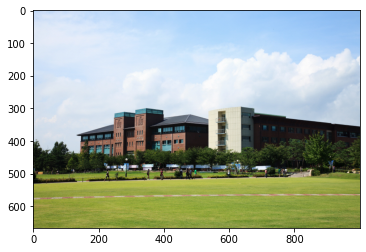

In [ ]:
img = Image.open('./data/school.jpg')
  
# asarray() class is used to convert PIL images into NumPy arrays 
numpydata = asarray(img) 

#  shape 
print(numpydata.shape) 
print(type(numpydata))
plt.imshow(numpydata)

## Understanding RGB

In [ ]:
# plt.figure(figsize=(20,5))

# print('shape:', numpydata.shape) 
# print('type:', type(numpydata))

# plt.subplot(141)
# plt.imshow(numpydata[300:600, 300:600, :])
# plt.axis("off")

# plt.subplot(142)
# plt.imshow(_______)
# plt.axis("off")

# plt.subplot(143)
# plt.imshow(_______)
# plt.axis("off")

# plt.subplot(144)
# plt.imshow(_______)
# plt.axis("off")

## Change color & Resize & Rotate

In [ ]:
img = _______
  
# asarray() class is used to convert PIL images into NumPy arrays 
numpydata = asarray(img) 
  
# <class 'numpy.ndarray'> 
print(type(numpydata)) 
  
#  shape 
print(numpydata.shape) 
plt.imshow(numpydata, cmap='gray')

(1000, 666)
(300, 200)


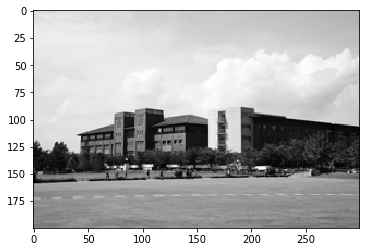

In [ ]:
print(img.size)
img2 = _______
print(img2.size)
plt.imshow(img2, cmap='gray')

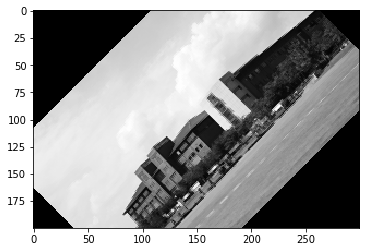

In [ ]:
img3 = _______
plt.imshow(img3, cmap='gray')

## Reshape & Scale

In [ ]:
a = np.arange(6)

print('Before:', a.shape)
"""WRITE THE CODE"""
print('After:', a.shape)

Before: (6,)
After: (3, 2)


In [ ]:
from sklearn.preprocessing import StandardScaler

data = [[0, 0], [0, 0], [1, 1], [1, 1]]
"""WRITE THE CODE"""

[[-1. -1.]
 [-1. -1.]
 [ 1.  1.]
 [ 1.  1.]]


## Histogram equalization

In [ ]:
def histeq(im, nbr_bins=256):
    """  Histogram equalization of a grayscale image. """

    # get image histogram
    imhist, bins = histogram(im.flatten(), nbr_bins, density=True)
    cdf = imhist.cumsum() # cumulative distribution function
    cdf = 255 * cdf / cdf[-1] # normalize

    # use linear interpolation of cdf to find new pixel values
    im2 = interp(im.flatten(),bins[:-1],cdf)

    return im2.reshape(im.shape), cdf

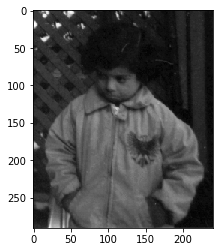

In [ ]:
from PIL import Image
from numpy import *

im = array(Image.open('./data/girl.jpg').convert('L'))
plt.imshow(im, cmap='gray')

<class 'numpy.ndarray'>


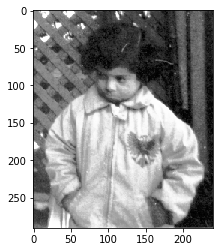

In [ ]:
im2,cdf = histeq(im)

print(type(im2))
plt.imshow(im2, cmap='gray')

## Blurring

In [ ]:
from PIL import Image
from numpy import *
from scipy.ndimage import filters

im = array(Image.open('./data/girl.jpg').convert('L'))
im2 = filters.gaussian_filter(im, 3)

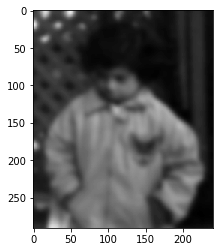

In [ ]:
plt.imshow(im2, cmap='gray')

--------

# 2️⃣ MNIST tutorial (Exercise1~Exercise11)
## Exercise(1) - Processing MNIST data

In [ ]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

print('... loading data')

# Read the MNIST data
with open('data/mnist.pkl', 'rb') as f:
    train_set, valid_set, test_set = pickle.load(f, encoding='latin1')

... loading data


In [ ]:
train_x, train_y = train_set
test_x, test_y = test_set

'''
WRIT THE CODE
'''
# Create dataframe
train_x = ____________
train_y = ____________
test_x = ____________
test_y = ____________

# Concatenate x and y
train_data = ____________
test_data = ____________

+ ___DataFrame.values:___ Return a Numpy representation of the DataFrame.

In [ ]:
print(train_data.shape, test_data.shape)
train_data.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9


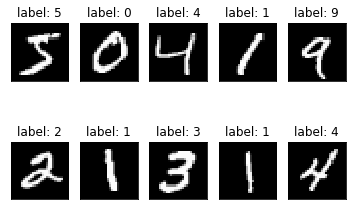

In [ ]:
subset_images_X = train_data.iloc[:10, :-1]
subset_images_Y = train_data.iloc[:10, -1]

for i, row in subset_images_X.iterrows():
    ax = plt.subplot(2, 5, i+1)

    pixels = ____________
    ____________
    plt.title('label: {}'.format(subset_images_Y[i]))
    
    plt.xticks([]) # erase the ticks
    plt.yticks([])

In [ ]:
print(train_data.shape, test_data.shape)

(50000, 785) (10000, 785)


## Exercise(2) - Template matching

### ✔️STEP1. Make binary data

In [ ]:
## binary train data
li = []
li = ____________
li.shape

## plot the image
image = li[10000, :].reshape((28, 28))
print(image)
plt.imshow(image, cmap='gray')

## make dataframe
bin_train_x = ____________
bin_train = ____________
print('binary train data shape: ', ________)

In [ ]:
## binary test data
li = []
li = np.array([np.array([1 if pix!=0 else 0 for pix in test_x.iloc[i, :]]) for i in range(len(test_x))])
li.shape

bin_test_x = pd.DataFrame(li)
bin_test = pd.concat([bin_test_x, test_y], axis=1)
print('binary train data shape: ', bin_test.shape)

binary train data shape:  (10000, 785)


[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

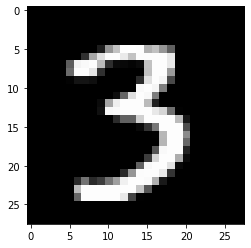

In [ ]:
## check the original data
orig_img = train_x.iloc[10000, :].values.reshape((28, 28))
plt.imshow(orig_img, cmap='gray')
print(orig_img)

### ✔️STEP2.  Choose lable_0, label_1 data

In [ ]:
## Data with label 0 and data with label 1
train_0_data = ____________
train_1_data = ____________

test_0_data = ____________
test_1_data = ____________
test_01_data = ____________

In [ ]:
print("train binary data shape: ", train_01_data.shape)
print("test binary data shape: ", test_01_data.shape)

### ✔️STEP3.  Template matching

In [ ]:
def plot_images(img1, img2, img3, img4, img5):
    plt.figure(figsize=[30, 10])
    plt.subplot(151)
    plt.imshow(img1.values.reshape((28,28)), cmap='gray')
    plt.title('label-0 train data', fontsize=20)

    plt.subplot(152)
    plt.imshow(img2.values.reshape((28,28)), cmap='gray')
    plt.title('label-1 train data', fontsize=20)
    
    plt.subplot(153)
    plt.imshow(img5[:-1].values.reshape((28,28)), cmap='gray')
    plt.title('test data', fontsize=20)
    
    plt.subplot(154)
    plt.imshow(img3.reshape((28,28)), cmap='gray')
    plt.title('1st test data & label-0 train data', fontsize=20)

    plt.subplot(155)
    plt.imshow(img4.reshape((28,28)), cmap='gray')
    plt.title('1st test data & label-1 train data', fontsize=20)
    plt.show()

In [ ]:
import numpy as np

# 1. Choose two representative images, randomly
tot_acc = 0
idx = ____

subset_train_zero = train_0_data.iloc[idx, :-1]
subset_train_one = train_1_data.iloc[idx, :-1]

# 2. For each test data, apply template matching twice to label it with a label that has more than 1.
prediction = []

for i, (idx, test_data) in enumerate(test_01_data.iterrows()):
    tmp_match_zero = ____________
    tmp_match_one = ____________

    prediction.____________
    
    if i==0:
        plot_images(subset_train_zero, subset_train_one, tmp_match_zero, tmp_match_one, test_data)
        
        print('Num of 1s after AND with 0-label train data: ', len(tmp_match_zero[tmp_match_zero==1]))
        print('Num of 1s after AND with 1-label train data: ', len(tmp_match_one[tmp_match_one==1]))
        print(prediction[0], '-lable yields larger number, thus ', (i+1), 'th test image is classfied as ', prediction[0], ' digit.')

### ❗️Expected Result
![image.png](attachment:image.png)
Num of 1s after AND with 0-label train data:  94  
Num of 1s after AND with 1-label train data:  47  
0 -lable yields larger number, thus  1 th test image is classfied as  0  digit.

In [ ]:
# 3. Compute the total accuracy
hits = ____________
acc = ____________

print('\n Total accuracy on Test data is {:.4f}'.format(acc))

-----
## Exercise(3) - Standardize MNIST data [optional]

In [ ]:
# Not used in the later analysis
from sklearn.preprocessing import StandardScaler

## standard scaling
train_x = train_data.iloc[:, :-1]
train_y = train_data.iloc[:, -1]

"""
WRITE THE CODE
"""

(50000, 784)
3.9149303e-10
0.9563151


## Exercise(4) - Covariance, Eigen vector / value

In [ ]:
## dimension reduction scratch
train_x = train_data.iloc[:, :-1]
train_y = train_data.iloc[:, -1]

# calcualte covariance matrix, eigen values and eigen vectors
cov_matrix = ____________
eig_val, eig_vec = ____________

# each column in eig_vec represents each eigen vector
# we want row vectors, thus perform transpose operation.
eig_vec = ____________
print('20 eigen values of 784 eigen values: ', ____________)

print('val:', ____________)
print('vec:', ____________)

### ❗️Expected Result

20 eigen values of 784 eigen values:  [40.43479516 29.37970424 26.78343901 20.59801996 18.09538535 15.85867349
 13.84664883 12.46504288 11.07377749 10.04212206  9.66264599  8.66117667
  7.98176524  7.85288477  7.39824929  7.14866705  6.72531409  6.62115541
  6.38252628  6.25569094] <br>
val: (784,)  
vec: (784, 784)

----
## Exercise(5) - Visualize eigen vectors

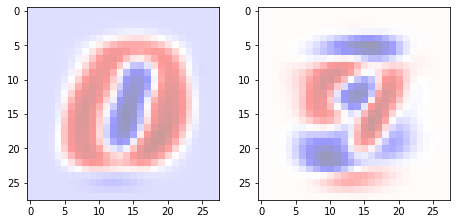

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

## Choose 2 vectors
good_vecs = ____________

plt.figure(figsize=(10, 5))
for i, vec in enumerate(good_vecs):
    vec = ____________
    vec = ____________

    ax = plt.subplot(2, 5, i+1)
    fig = plt.imshow(vec, alpha=0.4, cmap='seismic')

### ❗️Expected Result
![image.png](attachment:image.png)

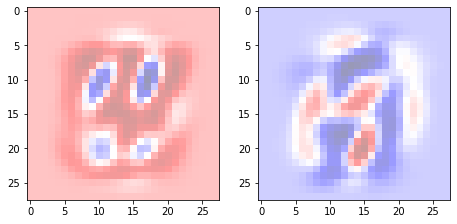

In [ ]:
bad_vecs = ____________

plt.figure(figsize=(10, 5))
for i, vec in enumerate(bad_vecs):
    vec = ____________
    vec = ____________

    ax = plt.subplot(2, 5, i+1)
    fig = plt.imshow(vec, alpha=0.4, cmap='seismic')

### ❗️Expected Result
![image.png](attachment:image.png)

https://colah.github.io/posts/2014-10-Visualizing-MNIST/

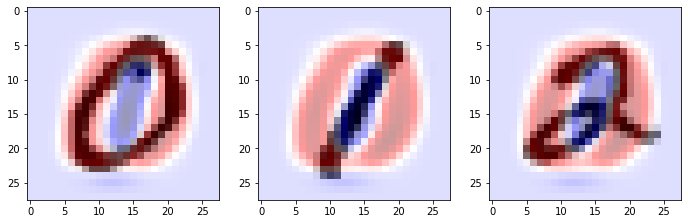

In [ ]:
zero_data = train_data[train_y==0].iloc[:, :-1].to_numpy()
one_data = train_data[train_y==1].iloc[:, :-1].to_numpy()
two_data = train_data[train_y==2].iloc[:, :-1].to_numpy()

plt.figure(figsize=(10, 5))
for i in range(3):
    vec = eig_vec[0].reshape((28,28)).real
    vec = np.array(vec)

    ax = plt.subplot(1, 3, i+1)
    
    if i==0:
        plt.imshow(zero_data[0].reshape((28, 28)), cmap='gray_r')
    elif i==1:
        plt.imshow(one_data[0].reshape((28, 28)), cmap='gray_r')
    elif i==2:
        plt.imshow(two_data[0].reshape((28, 28)), cmap='gray_r')
        
    plt.imshow(vec, alpha=0.4, cmap='seismic')

----
## Exercise(6) - Project data to matrix
+ ___np.vstack()___ : Stack arrays in sequence vertically (row wise).

In [ ]:
## Check the original array
train_data.head(3)

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.02294,-0.016899,-0.012524,-0.009867,-0.006321,0.0,0.0,0.0,0.0,5.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.02294,-0.016899,-0.012524,-0.009867,-0.006321,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.02294,-0.016899,-0.012524,-0.009867,-0.006321,0.0,0.0,0.0,0.0,4.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.02294,-0.016899,-0.012524,-0.009867,-0.006321,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.02294,-0.016899,-0.012524,-0.009867,-0.006321,0.0,0.0,0.0,0.0,9.0


In [ ]:
projected_x = ____________

print("new data points' shape: ", ____________, "X", ____________, "=", ____________) 
print("projected_x.shape: ",____________, " train_y.shape: ", ____________)

In [ ]:
new_coordinates = ____________

dataframe = ____________
dataframe.head(3)

----
## Exercise(7) - Visualize 2-dim MNIST data

In [ ]:
"""WRITE THE CODE"""
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))

plt.title('Visualizing MNIST through PCA', fontsize=24);
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

----
## Exercise(9) - Clustering & Visualization

In [ ]:
avg_point = []
X = []
Y = []

## calculate each label's mean value 
for i in range(0, 10):

    mean_data =____________
    """
    WRITE THE CODE
    """

## plot
plt.scatter(X, Y, s=50, c=[0,1,2,3,4,5,6,7,8,9], cmap='Spectral')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))

plt.title('Average point of PCA', fontsize=24);
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

In [ ]:
"""WRITE THE CODE"""
avg_point_df = pd.DataFrame(di, columns=['x', 'y'])

avg_point_df

In [ ]:
from math import *

def euclidean_distance(x, y):   
    return np.sqrt(np.sum((x - y) ** 2))

test_x, test_y = test_set
test_x = pd.DataFrame(test_x)
test_y = pd.DataFrame(test_y, columns=['label'])

projected_test_x = ____________
principal_df = ____________

## Test data's PCA : test_x, test_y
print('test data\'s shape:', test_x.shape, test_y.shape)

pred_idx = []
print(projected_test_x.shape, test_y.shape)
for i, (x, y) in enumerate(zip(projected_test_x, test_y.squeeze())):
    ## calculate uclidean distance
    distance = ____________
    pred = ____________
    pred_idx.append(pred)

print('pred_idx length: ', len(pred_idx))

In [ ]:
"""
WRITE THE CODE
"""

principal_df.head()

In [ ]:
plt.figure(figsize=(15,5))


plt.subplot(1,2,1)
plt.scatter(principal_df['PC 1'], principal_df['PC 2'], 
            s= 5, c=principal_df['pred_label'], cmap='Spectral')
"""
WRITE THE CODE
"""

plt.subplot(1,2,2)
plt.scatter(principal_df['PC 1'], principal_df['PC 2'], 
            s= 5, c=principal_df['label'], cmap='Spectral')
"""
WRITE THE CODE
"""

In [ ]:
"""
WRITE THE CODE
"""

print(principal_df)

----
## Exercise(10) - Explained variance

In [ ]:
nor_val = [] # Normalized eigen values
explained_variances = [] # explained_variances: accumulated eigen value's proportion
sums = ________

for i, v in enumerate(eig_val):
    nor_val.append(________)
    explained_variances.append(________)

dic = ________
ev = ________
print(ev.head())

plt.figure(figsize=(10,3))
"""
WRITE THE CODE
"""

In [ ]:
# Find the dimension when the 'explained variance ratio' is 95%

expvar_threshold = 0.95
for i, v in enumerate(explained_variances):
    if v >= expvar_threshold:
        print('#choson PCs : ', i+1)
        break

print('784 dim(pixel): {:.4f}% is explained in 784-dim.'.format(explained_variances[784-1]*100))
print('329 dim(pixel): {:.4f}% is explained in 329-dim.'.format(explained_variances[329-1]*100))
print('2 dim(pixel): {:.4f}% is explained in 2-dim.'.format(explained_variances[2-1]*100))

### * PCA using library
+ ___class sklearn.decomposition.PCA___(__n_components=None,__ *, copy=True, whiten=False, svd_solver='auto', tol=0.0, iterated_power='auto', random_state=None)

In [ ]:
from sklearn.decomposition import PCA
eig_dim = [2, 5, 10]

for d in eig_dim:
    """WRITE THE CODE"""
    print(f"dim: {d}, data\'s shape: {eig_train_data.shape}")

dim: 2, data's shape: (50000, 2)
dim: 5, data's shape: (50000, 5)
dim: 10, data's shape: (50000, 10)


----
## Exercise(11) - Image reconstruction

In [ ]:
plt.figure(figsize=(10, 5));

# Original image
plt.subplot(1, 3, 1);
"""WRITE THE CODE"""

# Image reconstruction from PCA data
pca = PCA(n_components = 100);
"""WRITE THE CODE"""


pca = PCA(n_components = 200);
"""WRITE THE CODE"""